In [130]:
import pandas as pd
df= pd.read_csv("Machine-learning-projects/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [131]:
from matplotlib import pyplot as plt
import numpy as np

In [132]:
df.drop("CustomerId",axis="columns", inplace =True)

In [133]:
df.drop("Surname",axis="columns", inplace =True)

In [134]:
df.drop("RowNumber",axis="columns", inplace =True)

In [135]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [136]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [137]:
df.shape

(10000, 11)

In [138]:
df['Exited'] = df['Exited'].map({1: 'Yes', 0: 'No'})

In [139]:
tenure_churn_no=df[df.Exited=="No"].Tenure
tenure_churn_yes=df[df.Exited=="Yes"].Tenure

Text(0, 0.5, 'Number of Customers')

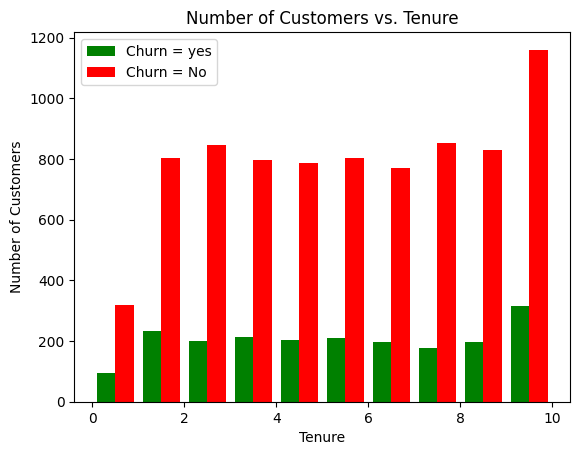

In [140]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=["Churn = yes","Churn = No"])
plt.legend()
plt.title("Number of Customers vs. Tenure")
# Add labels for the axes
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

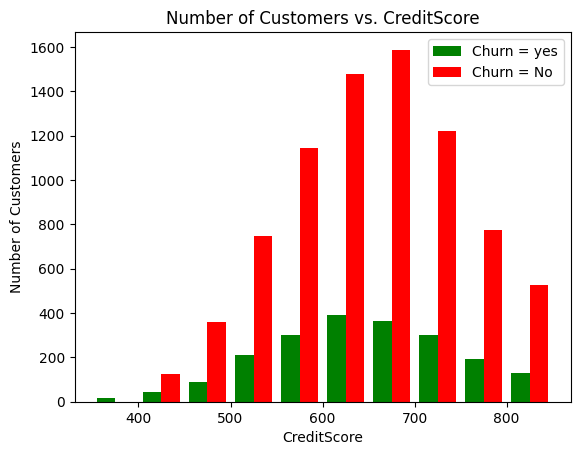

In [141]:
creditScore_churn_no = df[df.Exited=="No"].CreditScore 
creditScore_churn_yes = df[df.Exited=="Yes"].CreditScore 
plt.hist([creditScore_churn_yes,creditScore_churn_no],color=['green','red'],label=["Churn = yes","Churn = No"])
plt.legend()
plt.title("Number of Customers vs. CreditScore")
# Add labels for the axes
plt.xlabel("CreditScore")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

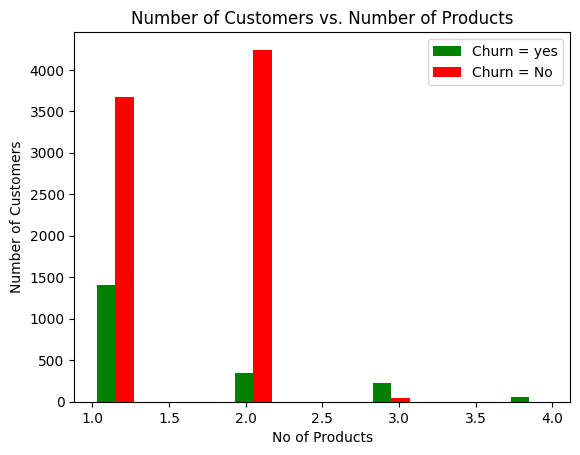

In [142]:
numOfProducts_churn_no = df[df.Exited=="No"].NumOfProducts
numOfProducts_churn_yes = df[df.Exited=="Yes"].NumOfProducts
plt.hist([numOfProducts_churn_yes,numOfProducts_churn_no],color=['green','red'],label=["Churn = yes","Churn = No"])
plt.legend()
plt.title("Number of Customers vs. Number of Products")
# Add labels for the axes
plt.xlabel("No of Products")
plt.ylabel("Number of Customers")

In [143]:
for column in df:
    print(df[column].unique)

<bound method Series.unique of 0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64>
<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>
<bound method Series.unique of 0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object>
<bound method Series.unique of 0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64>
<bound method Series.unique of 0        2
1        1
2        8
3        1
4        2
        ..
9995  

In [144]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()


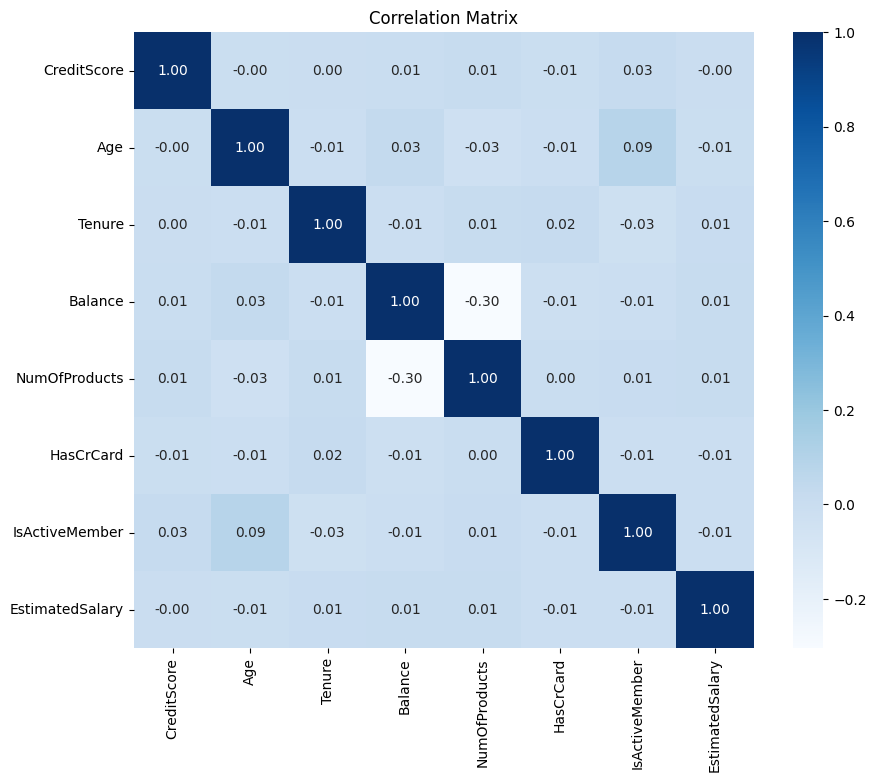

In [145]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

df

In [146]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'CreditScore': [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802

"Ensure to encode the categorical columns (Geography, Gender) appropriately before training your machine learning model"

In [147]:
# Remove the outliers
from scipy import stats
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate Z-scores for each column
z_scores = stats.zscore(numeric_df)

# Define threshold for outlier detection (e.g., Z-score > 3 or < -3)
threshold = 3
filtered_df = df[(z_scores < threshold).all(axis=1)]
df=filtered_df 

In [148]:
df=df.reset_index(drop=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9802,771,France,Male,39,5,0.00,2,1,0,96270.64,No
9803,516,France,Male,35,10,57369.61,1,1,1,101699.77,No
9804,709,France,Female,36,7,0.00,1,0,1,42085.58,Yes
9805,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Yes


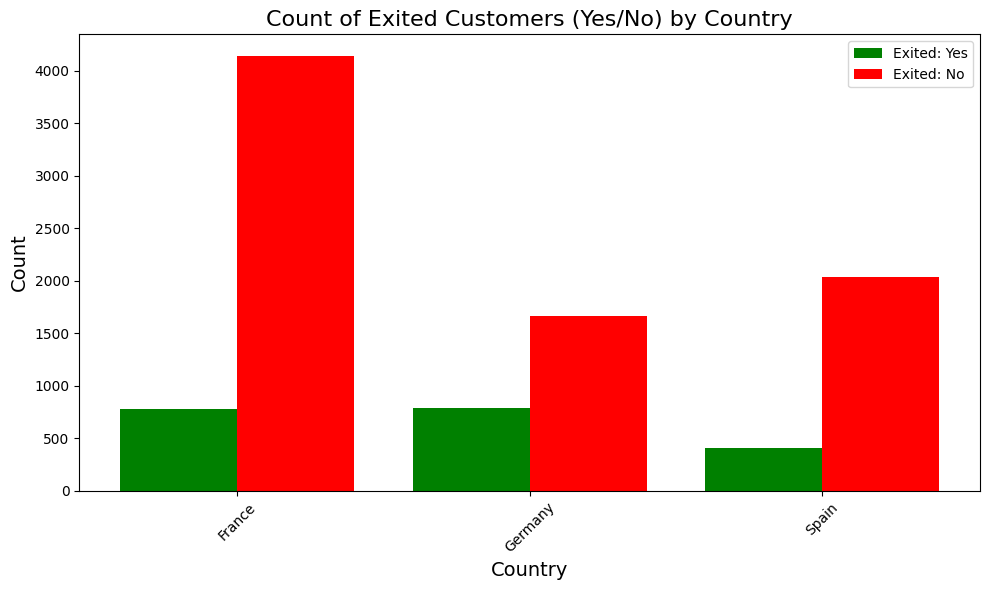

In [149]:
# Count 'Exited' values ('Yes' and 'No') for each 'Geography'
country_exited_counts = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
# Get list of countries for x-axis
countries = country_exited_counts.index
x = range(len(countries))
# Plot bars for 'Yes' and 'No' side by side for each country
width = 0.4
plt.bar(x, country_exited_counts['Yes'], width=width, label='Exited: Yes', color='green', align='center')
plt.bar([i + width for i in x], country_exited_counts['No'], width=width, label='Exited: No', color='red', align='center')

plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Exited Customers (Yes/No) by Country', fontsize=16)
plt.xticks([i + width/2 for i in x], countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [150]:
# Count the occurrences of each class in 'Exited'
class_counts = df['Exited'].value_counts()

print("Class counts for 'Exited' column:")
print(class_counts)

Class counts for 'Exited' column:
Exited
No     7841
Yes    1966
Name: count, dtype: int64


In [151]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited              object
dtype: object

In [152]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create synthetic_df with encoded features and target variable
synthetic_df = pd.DataFrame(X_resampled, columns=X.columns)
synthetic_df['Exited'] = y_resampled  # Add back the target variable

# Display synthetic_df
print("Synthetic DataFrame (after SMOTE and encoding):")
print(synthetic_df)

# Display data types of synthetic_df
print("\nData Types of Synthetic DataFrame:")
print(synthetic_df.dtypes)

Synthetic DataFrame (after SMOTE and encoding):
       CreditScore  Geography  Gender  Age  Tenure        Balance  \
0              619          0       0   42       2       0.000000   
1              608          2       0   41       1   83807.860000   
2              502          0       0   42       8  159660.800000   
3              699          0       0   39       1       0.000000   
4              850          2       0   43       2  125510.820000   
...            ...        ...     ...  ...     ...            ...   
15677          643          0       0   43       3       0.000000   
15678          743          1       0   49       1  121502.099627   
15679          468          1       0   51       8  109916.533301   
15680          437          1       0   52       5   91935.185473   
15681          665          0       0   35       3   57970.422126   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary Exited  
0                  1          1               1  

In [153]:
synthetic_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,Yes
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,No
2,502,0,0,42,8,159660.800000,3,1,0,113931.570000,Yes
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,No
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,No
...,...,...,...,...,...,...,...,...,...,...,...
15677,643,0,0,43,3,0.000000,2,1,0,115274.063004,Yes
15678,743,1,0,49,1,121502.099627,1,0,0,106041.185770,Yes
15679,468,1,0,51,8,109916.533301,1,0,0,96772.308057,Yes
15680,437,1,0,52,5,91935.185473,1,1,0,145460.993935,Yes


In [104]:
# Count the occurrences of each class in 'Exited'
class_counts = synthetic_df['Exited'].value_counts()

print("Class counts for 'Exited' column:")
print(class_counts)

Class counts for 'Exited' column:
Exited
Yes    7841
No     7841
Name: count, dtype: int64


In [154]:
df=synthetic_df

In [155]:
# Remove the outliers
from scipy import stats
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate Z-scores for each column
z_scores = stats.zscore(numeric_df)

# Define threshold for outlier detection (e.g., Z-score > 3 or < -3)
threshold = 3
filtered_df = df[(z_scores < threshold).all(axis=1)]
df=filtered_df 

In [156]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,Yes
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,No
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,No
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,No
5,645,2,1,44,8,113755.780000,2,1,0,149756.710000,Yes
...,...,...,...,...,...,...,...,...,...,...,...
15677,643,0,0,43,3,0.000000,2,1,0,115274.063004,Yes
15678,743,1,0,49,1,121502.099627,1,0,0,106041.185770,Yes
15679,468,1,0,51,8,109916.533301,1,0,0,96772.308057,Yes
15680,437,1,0,52,5,91935.185473,1,1,0,145460.993935,Yes


Text(0, 0.5, 'Number of Customers')

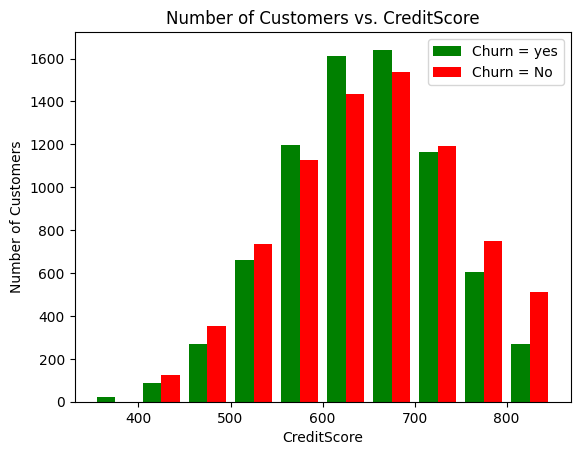

In [157]:
creditScore_churn_no = df[df.Exited=="No"].CreditScore 
creditScore_churn_yes = df[df.Exited=="Yes"].CreditScore 
plt.hist([creditScore_churn_yes,creditScore_churn_no],color=['green','red'],label=["Churn = yes","Churn = No"])
plt.legend()
plt.title("Number of Customers vs. CreditScore")
# Add labels for the axes
plt.xlabel("CreditScore")
plt.ylabel("Number of Customers")

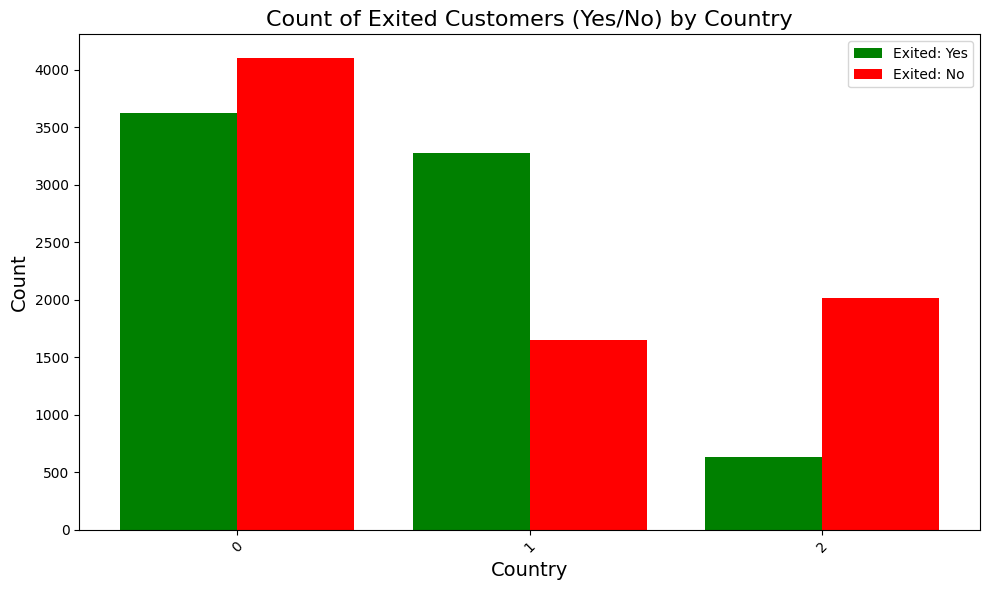

In [158]:
# Count 'Exited' values ('Yes' and 'No') for each 'Geography'
country_exited_counts = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
# Get list of countries for x-axis
countries = country_exited_counts.index
x = range(len(countries))
# Plot bars for 'Yes' and 'No' side by side for each country
width = 0.4
plt.bar(x, country_exited_counts['Yes'], width=width, label='Exited: Yes', color='green', align='center')
plt.bar([i + width for i in x], country_exited_counts['No'], width=width, label='Exited: No', color='red', align='center')

plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Exited Customers (Yes/No) by Country', fontsize=16)
plt.xticks([i + width/2 for i in x], countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

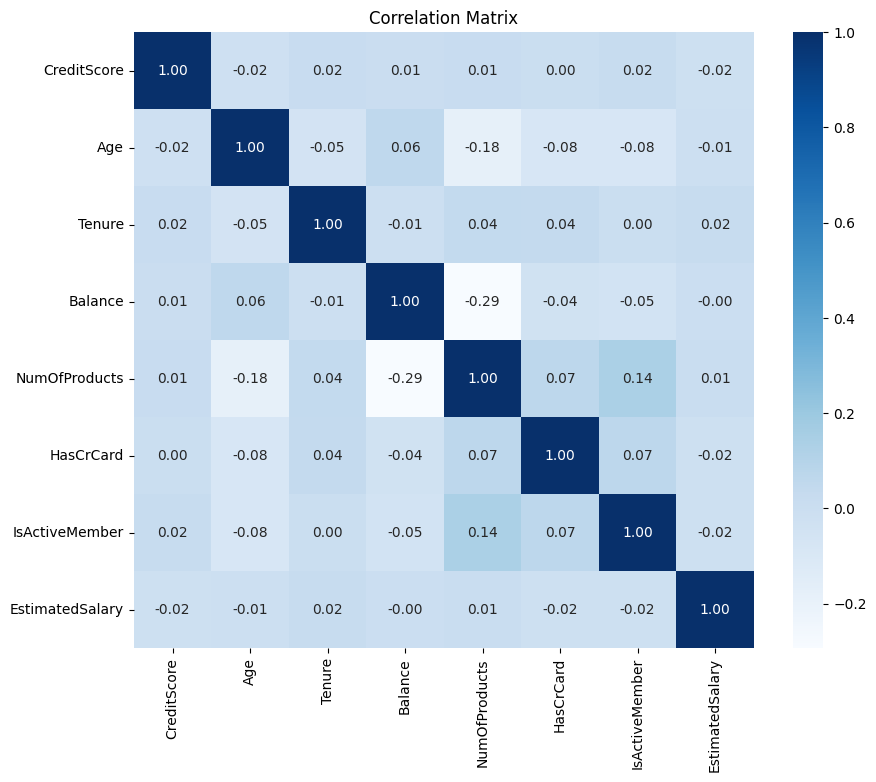

In [159]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

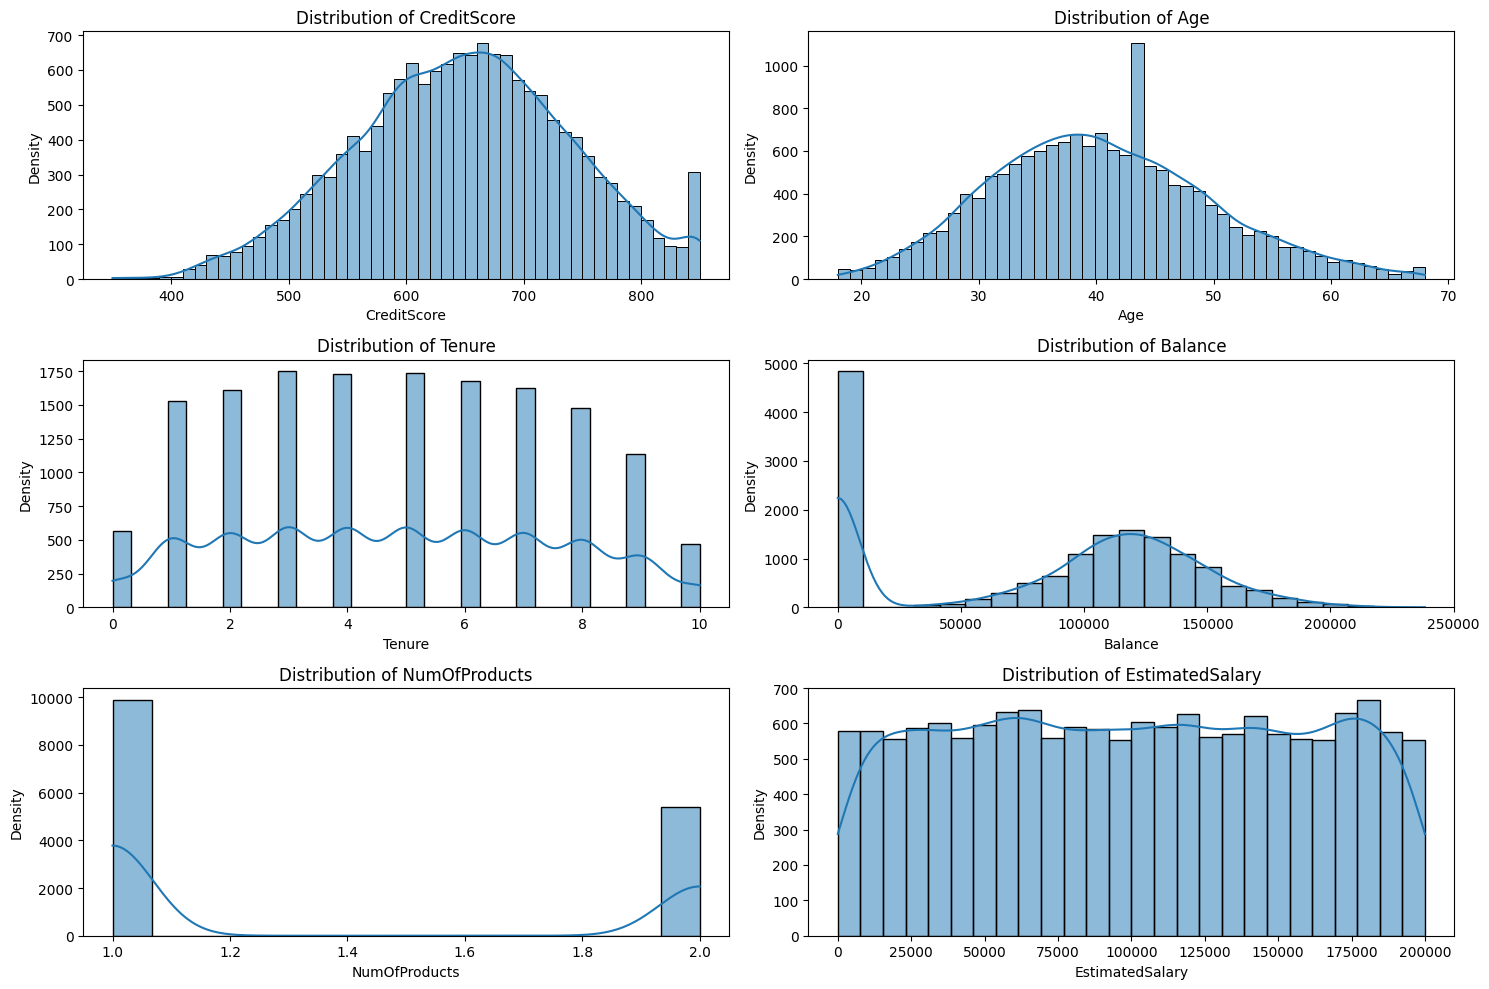

In [160]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# Plot distribution curves for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  
    sns.histplot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [161]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,Yes
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,No
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,No
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,No
5,645,2,1,44,8,113755.780000,2,1,0,149756.710000,Yes
...,...,...,...,...,...,...,...,...,...,...,...
15677,643,0,0,43,3,0.000000,2,1,0,115274.063004,Yes
15678,743,1,0,49,1,121502.099627,1,0,0,106041.185770,Yes
15679,468,1,0,51,8,109916.533301,1,0,0,96772.308057,Yes
15680,437,1,0,52,5,91935.185473,1,1,0,145460.993935,Yes


In [162]:
synthetic_df['HasCrCard'] = synthetic_df['HasCrCard'].map({0: 'No', 1: 'Yes'})
synthetic_df['IsActiveMember'] = synthetic_df['IsActiveMember'].map({0: 'No', 1: 'Yes'})

In [166]:
synthetic_df['Geography'] = synthetic_df['Geography'].map({0: 'France', 1: 'Germany', 2: 'Spain'})
synthetic_df['Gender'] = synthetic_df['Gender'].map({0: 'Female', 1: 'Male'})


In [ ]:
male_df = df[df['Gender'] == 'Male']
male_df

In [ ]:
female_df = df[df['Gender'] == 'Female']
female_df

In [189]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
Churn               object
dtype: object

Accuracy: 0.8602856778472133
F1 Score: 0.8605435682006237
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7841
           1       0.86      0.86      0.86      7841

    accuracy                           0.86     15682
   macro avg       0.86      0.86      0.86     15682
weighted avg       0.86      0.86      0.86     15682



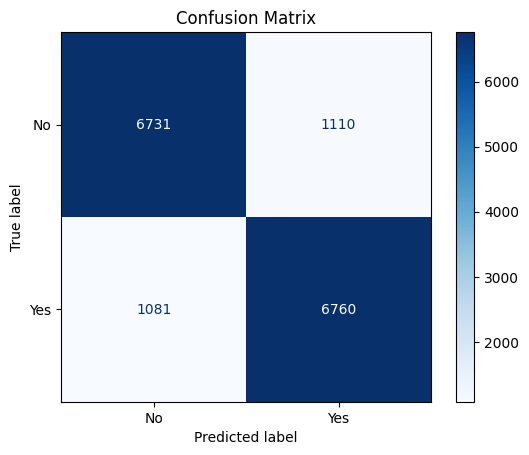

In [190]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc
import matplotlib.pyplot as plt

# Ensure 'Exited' and 'Churn' columns are dropped since 'Churn' already contains the target values
df = df.drop(columns=['Exited'])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['HasCrCard'] = label_encoder.fit_transform(df['HasCrCard'])
df['IsActiveMember'] = label_encoder.fit_transform(df['IsActiveMember'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_classifier, X, y, cv=kfold)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, pos_label=1)
report = classification_report(y, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

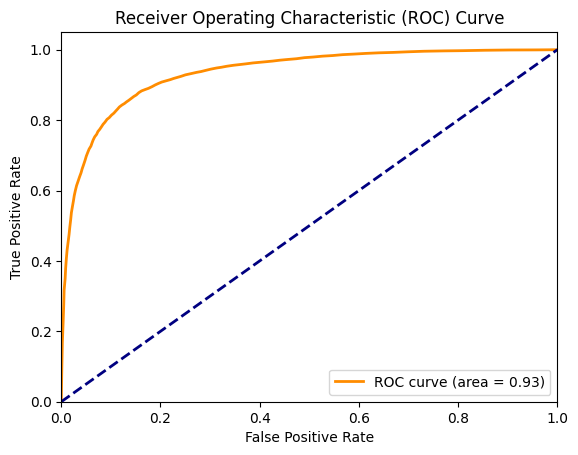

In [195]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc
y_pred_proba = cross_val_predict(rf_classifier, X, y, cv=kfold, method='predict_proba')
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [196]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.570000,1
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...
15677,643,0,0,43,3,0.000000,2,1,0,115274.063004,1
15678,743,1,0,49,1,121502.099627,1,0,0,106041.185770,1
15679,468,1,0,51,8,109916.533301,1,0,0,96772.308057,1
15680,437,1,0,52,5,91935.185473,1,1,0,145460.993935,1


Accuracy: 0.8362453768651957
F1 Score: 0.8359524722115753
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7841
           1       0.84      0.83      0.84      7841

    accuracy                           0.84     15682
   macro avg       0.84      0.84      0.84     15682
weighted avg       0.84      0.84      0.84     15682



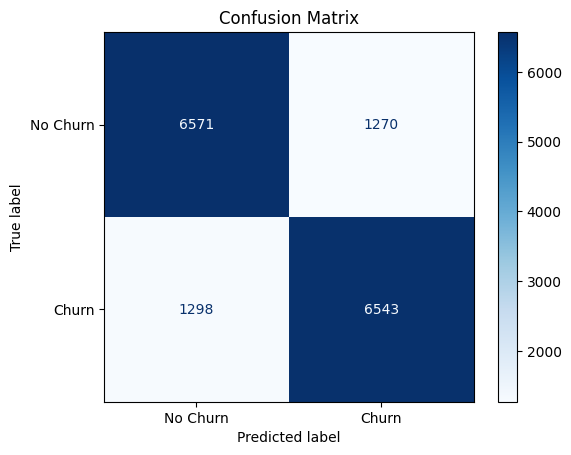

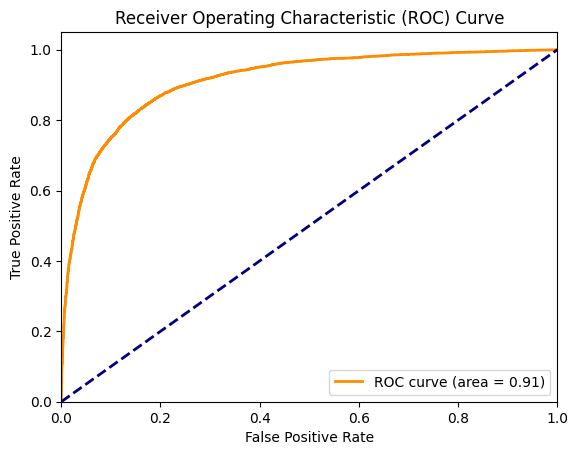

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
X = scaler.fit_transform(X)
svm_classifier = SVC(probability=True, random_state=42)

# Perform K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm_classifier, X, y, cv=kfold)
y_pred_proba = cross_val_predict(svm_classifier, X, y, cv=kfold, method='predict_proba')
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
report = classification_report(y, y_pred)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)

conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [201]:
import pickle
from IPython.display import FileLink
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)
FileLink('random_forest_model.pkl')

C:\Users\elroy\random_forest_model.pkl

# Modelling

In [218]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
X = df.drop("Churn",axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
models = [('LR', LogisticRegression(random_state=42)),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier(random_state=42)),
          ('RF', RandomForestClassifier(random_state=42)),
          ('SVR', SVC(gamma='auto',random_state=42)),
          ('GB', GradientBoostingClassifier(random_state = 42)),
          ("LightGBM", LGBMClassifier(random_state=42))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    output = "%s: %f " % (name, cv_results.mean())
    print(output)

C:\Users\elroy\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\elroy\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LR: 0.648196 
KNN: 0.656429 
DT: 0.785873 
RF: 0.850086 
SVR: 0.147040 
GB: 0.822601 
[LightGBM] [Info] Number of positive: 7510, number of negative: 6603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 14113, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532133 -> initscore=0.128711
[LightGBM] [Info] Start training from score 0.128711
[LightGBM] [Info] Number of positive: 7519, number of negative: 6594
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data 